#### Description

This code finds optimal num_parents for the GA_2_2 GeneticAlgorithm run method.

Rerunning with more run_per_expression and with target_expression = 1. In GA_Testing_2_2_parents_1, we see little variation for target_expression = 0.

In [11]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import pandas as pd
import time

from GA_2_2 import GeneticAlgorithm

In [12]:
# Control variables
cnn_model_path = '../Models/CNN_6_1_2.keras'
masked_sequence = 'NNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNN'
max_length = 150
pop_size = 200
generations = 100
base_mutation_rate = 0.05
precision = 0.001

# Testing variables
run_per_experiment = 50
results = []
target_expression = 1
range_selection = ['tournament', 'tournament_pop', 'roulette', 'rank_based', 'truncation', 'boltzmann']

In [13]:
for selection in range_selection:
    for run_id in range(run_per_experiment):
        print(f'selection: {selection} | Run {run_id + 1} ', end='\r')

        ga = GeneticAlgorithm(
            cnn_model_path=cnn_model_path,
            masked_sequence=masked_sequence,
            target_expression=target_expression,
            max_length=max_length,
            pop_size=pop_size,
            generations=generations,
            base_mutation_rate=base_mutation_rate,
            precision=precision,
            chromosomes=1,
            islands=1,
            num_parents=2,
            gene_flow_rate=0,
            selection=selection, # Dependent variable
            print_progress=False,
            early_stopping=False
        )
        
        # Time the run
        start_time = time.time()
        best_sequence, best_prediction = ga.run()
        end_time = time.time()
        run_time = end_time - start_time
        
        # Record the results
        results.append({
            'selection': selection,
            'run_id': run_id + 1,
            'best_sequence': best_sequence,
            'error': abs(best_prediction - target_expression),
            'run_time': run_time
        })

# Convert results to a DataFrame for analysis
results_df = pd.DataFrame(results)

c:\Users\rsore\anaconda3\envs\TX_prediction\Lib\site-packages\keras\src\saving\saving_lib.py:719: UserWarning: Skipping variable loading for optimizer 'adam', because it has 34 variables whereas the saved optimizer has 2 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


In [14]:
results_df.head()

,selection,run_id,best_sequence,error,run_time
0,tournament,1,AAATGGAGAAAAAAGGGGTGTAAAATGGTATACTATGATATAATAT...,0.000066,7.743742
1,tournament,2,CGCTGGTATAAAGCTTGTACTTGCCTGATAAAGTATAATTGGTATA...,0.000034,6.363372
2,tournament,3,TTATACTTGTCTGACATTTGACGTTTAAGGGTTAATGCATTATAAT...,0.000029,6.057587
3,tournament,4,CAATGGTATACTTTTACTTGACTTGGTATACTATAATGTATAATAT...,0.000020,5.789976
4,tournament,5,GGCTGGTATAATTAGAGTTGACTACGTAGAATGACAGTGGTATAAT...,0.000008,5.885400


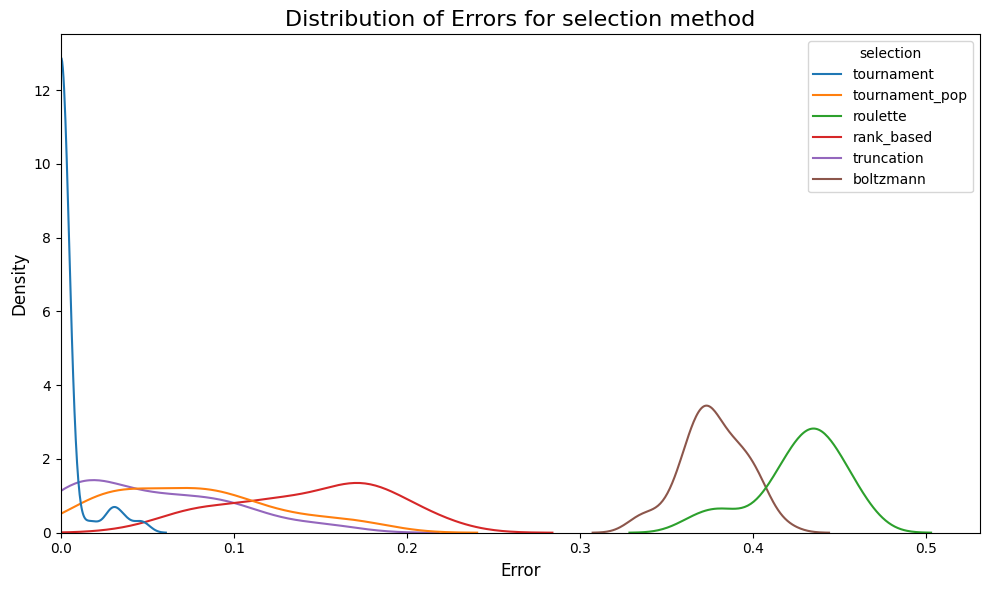

In [15]:
plt.figure(figsize=(10, 6))
sns.kdeplot(data=results_df, x='error', hue='selection', fill=False)

plt.title('Distribution of Errors for selection method', fontsize=16)
plt.xlabel('Error', fontsize=12)
plt.ylabel('Density', fontsize=12)
plt.xlim(0)

plt.tight_layout()
plt.show()


C:\Users\rsore\AppData\Local\Temp\ipykernel_32840\3867254764.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=results_df, x='selection', y='error', palette='Set2')


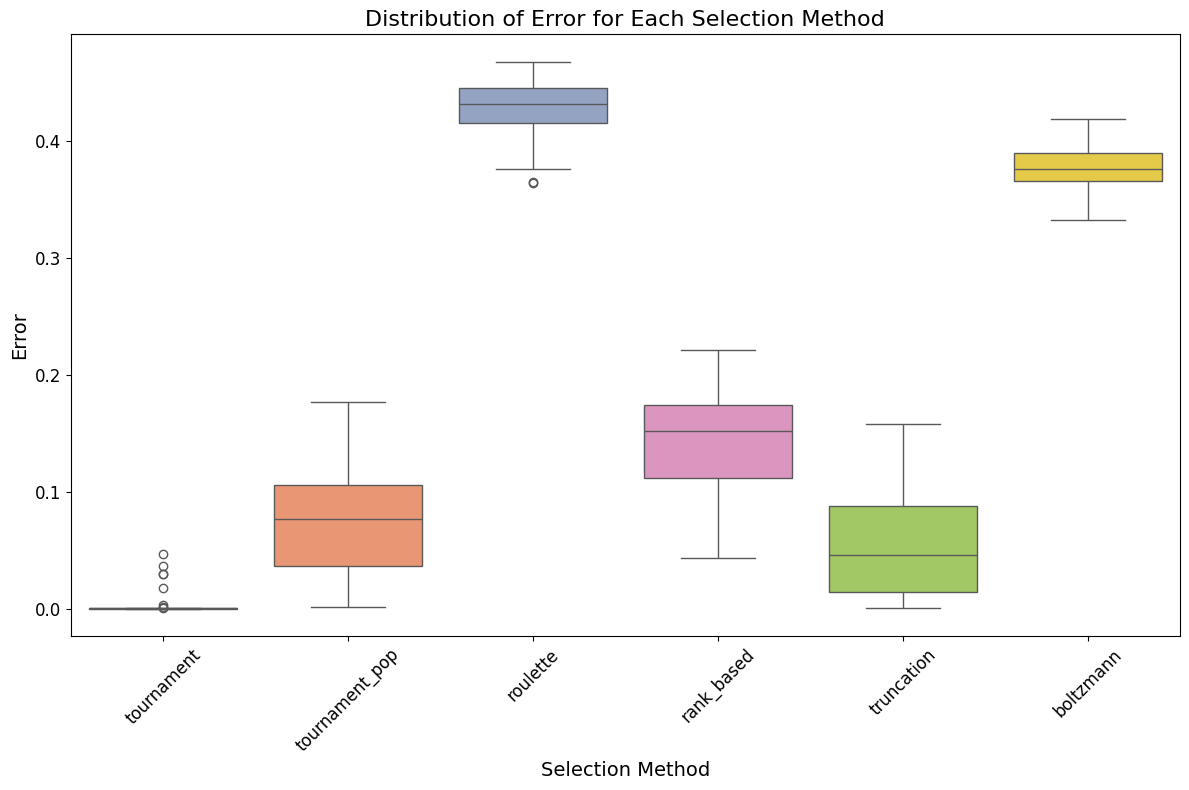

In [16]:
# Plot the distribution of runtime for each selection method
plt.figure(figsize=(12, 8))
sns.boxplot(data=results_df, x='selection', y='error', palette='Set2')

plt.xlabel('Selection Method', fontsize=14)
plt.ylabel('Error', fontsize=14)
plt.title('Distribution of Error for Each Selection Method', fontsize=16)
plt.xticks(fontsize=12, rotation=45)
plt.yticks(fontsize=12)

plt.tight_layout()
plt.show()


C:\Users\rsore\AppData\Local\Temp\ipykernel_32840\3675644026.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=results_df, x='selection', y='run_time', palette='Set2')


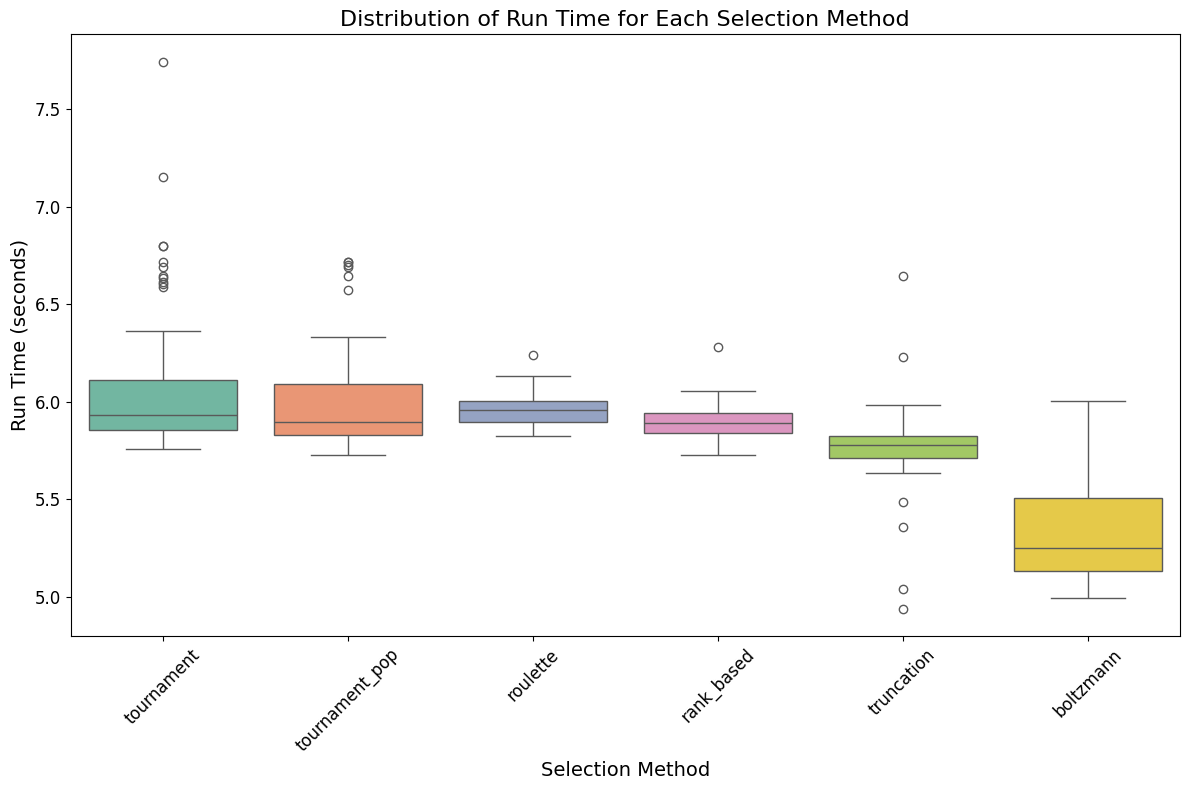

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot the distribution of runtime for each selection method
plt.figure(figsize=(12, 8))
sns.boxplot(data=results_df, x='selection', y='run_time', palette='Set2')

# Add labels and title
plt.xlabel('Selection Method', fontsize=14)
plt.ylabel('Run Time (seconds)', fontsize=14)
plt.title('Distribution of Run Time for Each Selection Method', fontsize=16)
plt.xticks(fontsize=12, rotation=45)
plt.yticks(fontsize=12)

# Display the plot
plt.tight_layout()
plt.show()
